In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [ ]:
raw_df = pd.read_csv('credit_card.csv')


In [ ]:
print(raw_df)

     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0       

In [ ]:
raw_df = raw_df.drop('CUST_ID', axis = 1) 


In [ ]:
print(raw_df)

          BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.9

In [ ]:
raw_df = pd.read_csv('credit_card.csv')
raw_df = raw_df.drop('CUST_ID', axis = 1) 
raw_df.fillna(method ='ffill', inplace = True) 
raw_df.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


In [ ]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(raw_df) 

In [ ]:
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 

In [ ]:
normalized_df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.312038,-0.106331,-0.181129,-0.152156,-0.148808,-0.198985,-0.343796,-0.289304,-0.301518,-0.287892,-0.202942,-0.217975,-0.409413,-0.225497,-0.130160,-0.224036,0.153753
1,0.219928,0.037539,-0.131224,-0.099751,-0.127038,0.728177,-0.341439,-0.189662,-0.256269,0.160403,0.030762,-0.165387,0.192455,0.228782,0.024353,0.065458,0.100798


In [ ]:
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
pca = pca.fit(normalized_df) 
X_principal = pca.transform(normalized_df)
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(10)

,P1,P2
0,-0.489949,-0.679976
1,-0.519099,0.544827
2,0.330633,0.268879
3,-0.481656,-0.097611
4,-0.563512,-0.482506
5,0.336076,-0.235098
6,0.756178,0.388880
7,0.576473,-0.261946
8,-0.185031,-0.254403
9,-0.217363,-0.124388


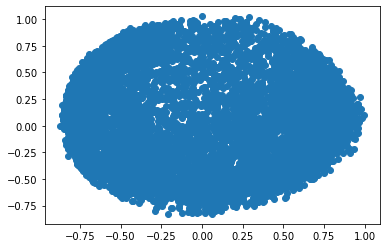

In [ ]:
plt.scatter(X_principal['P1'], X_principal['P2'])

## Hierarchical Clustering

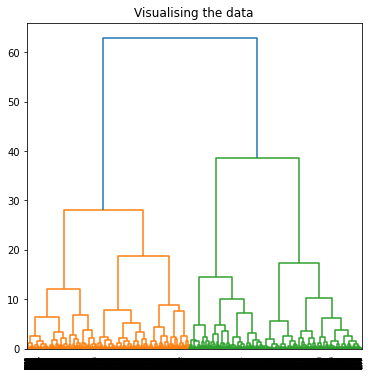

In [ ]:
plt.figure(figsize =(6, 6)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward'))) 

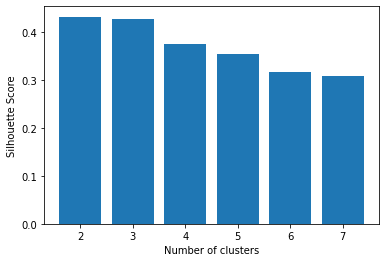

In [ ]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_principal, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [ ]:
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X_principal)

AgglomerativeClustering(n_clusters=3)

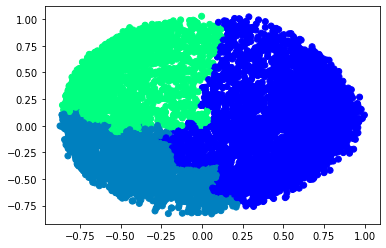

In [ ]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AgglomerativeClustering(n_clusters = 3).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

## K-Means Clustering

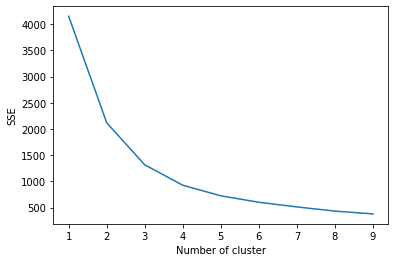

In [ ]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_principal)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X_principal)

KMeans(n_clusters=6)

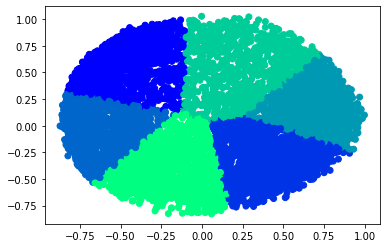

In [ ]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = KMeans(n_clusters = 6).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

In [ ]:
kmeans.cluster_centers_

array([[ 0.22727079,  0.54867429],
       [-0.47881822,  0.56465267],
       [ 0.47006424, -0.30822096],
       [-0.65937727, -0.10569002],
       [ 0.70458777,  0.20163748],
       [-0.23111496, -0.43049916]])

In [ ]:
input = pca.transform(np.reshape(np.array(normalized_df.iloc[0]), (-1, 17)))

In [ ]:
label = kmeans.predict(input)

print(label)

[5]
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=486c3042-68b8-438c-a156-48d94106b4cb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>